In [24]:

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [149]:
df=pd.read_csv('survey-results-public.csv')
df.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


In [3]:
# Check rows,columns
df.shape

(51392, 154)

In [4]:
#show data types and count per category
df.dtypes.value_counts()

object     147
float64      6
int64        1
dtype: int64

In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [6]:
#Below we see the number of missing values in each column 
df.isnull().sum().sort_values(ascending=False)

ExCoder10Years        50475
ExCoderNotForMe       50471
ExCoderWillNotCode    50470
ExCoderReturn         50469
ExCoderBalance        50469
                      ...  
University                0
Country                   0
ProgramHobby              0
Professional              0
Respondent                0
Length: 154, dtype: int64

In [7]:
#drop columns - we keep only the relavant columns for our analysis

col_drop=['Respondent','ProgramHobby','HomeRemote','YearsProgram','YearsCodedJob','YearsCodedJobPast','DeveloperType','WebDeveloperType','MobileDeveloperType',
'NonDeveloperType','ExCoderReturn','ExCoderNotForMe','ExCoderBalance','ExCoder10Years','ExCoderBelonged','ExCoderSkills','ExCoderWillNotCode',
'ExCoderActive','ProblemSolving','BuildingThings','LearningNewTech','BoringDetails','JobSecurity','DiversityImportant','AnnoyingUI','FriendsDevelopers',
'RightWrongWay','UnderstandComputers','SeriousWork','InvestTimeTools','WorkPayCare','KinshipDevelopers','ChallengeMyself','CompetePeers','ChangeWorld','JobSeekingStatus',
'HoursPerWeek','LastNewJob','AssessJobIndustry','AssessJobRole','AssessJobExp','AssessJobDept','AssessJobTech','AssessJobProjects','AssessJobCompensation','AssessJobOffice',
'AssessJobCommute','AssessJobRemote','AssessJobLeaders','AssessJobProfDevel','AssessJobDiversity','AssessJobProduct','AssessJobFinances','ImportantBenefits',
'ClickyKeys','JobProfile','ResumePrompted','LearnedHiring','ImportantHiringAlgorithms','ImportantHiringTechExp','ImportantHiringCommunication','ImportantHiringOpenSource',
'ImportantHiringPMExp','ImportantHiringCompanies','ImportantHiringTitles','ImportantHiringEducation','ImportantHiringRep','ImportantHiringGettingThingsDone','Currency',
'Overpaid','TabsSpaces','EducationImportant','EducationTypes','SelfTaughtTypes','TimeAfterBootcamp','CousinEducation','WorkStart','HaveWorkedLanguage','WantWorkLanguage',
'HaveWorkedFramework','WantWorkFramework','HaveWorkedDatabase','WantWorkDatabase','HaveWorkedPlatform','WantWorkPlatform','IDE','AuditoryEnvironment','Methodology',
'VersionControl','CheckInCode','ShipIt','OtherPeoplesCode','ProjectManagement','EnjoyDebugging','InTheZone','DifficultCommunication','CollaborateRemote',
'MetricAssess','EquipmentSatisfiedMonitors','EquipmentSatisfiedCPU','EquipmentSatisfiedRAM','EquipmentSatisfiedStorage','EquipmentSatisfiedRW','InfluenceInternet',  
'InfluenceWorkstation','InfluenceHardware','InfluenceServers','InfluenceTechStack','InfluenceDeptTech','InfluenceVizTools','InfluenceDatabase','InfluenceCloud','InfluenceConsultants',
'InfluenceRecruitment','InfluenceCommunication','HighestEducationParents','Race','SurveyLong','QuestionsInteresting','QuestionsConfusing','InterestedAnswers']
df.drop(col_drop,axis=1,inplace=True)

In [8]:
df.head()

,Professional,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,CompanySize,CompanyType,CareerSatisfaction,JobSatisfaction,...,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,Salary,ExpectedSalary
0,Student,United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,NaN,...,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,NaN,NaN
1,Student,United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,20 to 99 employees,"Privately-held limited company, not in startup...",NaN,NaN,...,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,NaN,37500.0
2,Professional developer,United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"10,000 or more employees",Publicly-traded corporation,8.0,9.0,...,Disagree,Strongly disagree,Strongly agree,Agree,Agree,Agree,Disagree,Male,113750.0,NaN
3,Professional non-developer who sometimes write...,United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"10,000 or more employees",Non-profit/non-governmental organization or pr...,6.0,3.0,...,Strongly disagree,Strongly disagree,Strongly agree,Strongly agree,Agree,Strongly agree,Disagree,Male,NaN,NaN
4,Professional developer,Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,10 to 19 employees,"Privately-held limited company, not in startup...",6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# check the nulls
df.isnull().sum().sort_values(ascending=False)

ExpectedSalary                 48826
Salary                         38501
StackOverflowModeration        21263
StackOverflowAdsRelevant       20575
StackOverflowMakeMoney         20330
StackOverflowAdsDistracting    19655
StackOverflowCommunity         18982
StackOverflowWhatDo            18023
StackOverflowMetaChat          17985
StackOverflowJobSearch         17977
StackOverflowCompanyPage       17957
StackOverflowJobListing        17924
StackOverflowAnswer            17836
StackOverflowNewQuestion       17774
StackOverflowBetter            17742
StackOverflowCopiedCode        17483
StackOverflowHelpful           17446
StackOverflowFoundAnswer       17102
Gender                         16345
StackOverflowDevices           16189
StackOverflowSatisfaction      14800
StackOverflowDescribes         14460
CompanyType                    12569
CompanySize                    12470
JobSatisfaction                11016
CareerSatisfaction              8697
MajorUndergrad                  8551
P

#### Question1:what are the first 4 countries in which the survey was done?

In [13]:
# find the top 4 countries with the greatest entries
top_4=df['Country'].value_counts(dropna=False).sort_values(ascending=False)[:4]
top_4

United States     11455
India              5197
United Kingdom     4395
Germany            4143
Name: Country, dtype: int64

Text(0, 0.5, 'Country')

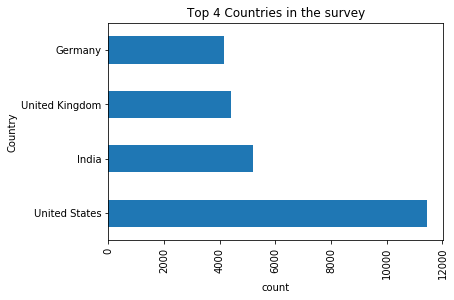

In [26]:
# Plot the above finding with barh
top_4.plot(kind='barh')
plt.xticks(rotation='vertical')
plt.title('Top 4 Countries in the survey')
plt.xlabel('count')
plt.ylabel('Country')

Question 2: what is the distribution of professional occupations in the above 4 countries?

In [30]:
# check for nulls
df['Professional'].isnull().sum()

0

In [31]:
df['Professional'].value_counts(dropna=False)

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64

In [32]:
index=['Professional developer','Student','Professional non-developer who sometimes writes code','Used to be a professional developer','None of these']

<BarContainer object of 5 artists>

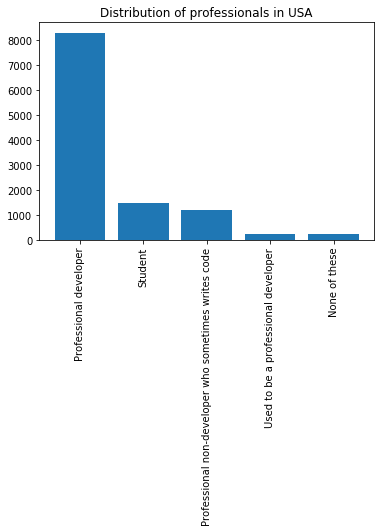

In [33]:
#distribution of Professional in USA
usa=df['Professional'][df['Country']=='United States']
data_usa=usa.value_counts()
plt.xticks(rotation='90')
plt.title('Distribution of professionals in USA')
plt.bar(index,data_usa)

<BarContainer object of 5 artists>

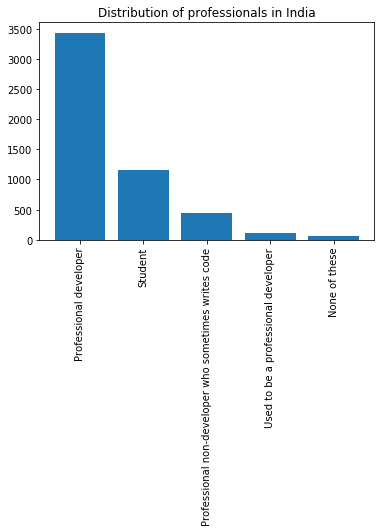

In [34]:
#distribution of Professional and India
india=df['Professional'][df['Country']=='India']
data_india=india.value_counts()
plt.xticks(rotation='vertical')
plt.title('Distribution of professionals in India')
plt.bar(index,data_india)

<BarContainer object of 5 artists>

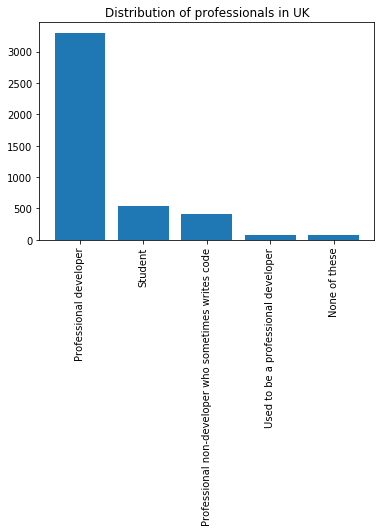

In [35]:
#distribution of Professional and United Kingsom
uk=df['Professional'][df['Country']=='United Kingdom']
data_uk=uk.value_counts()
plt.xticks(rotation='vertical')
plt.title('Distribution of professionals in UK')
plt.bar(index,data_uk)

<BarContainer object of 5 artists>

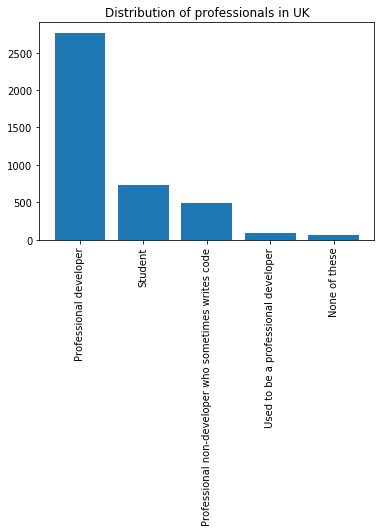

In [36]:
#distribution of Professional and Germany
ger=df['Professional'][df['Country']=='Germany']
data_ger=ger.value_counts()
plt.xticks(rotation='vertical')
plt.title('Distribution of professionals in UK')
plt.bar(index,data_ger)

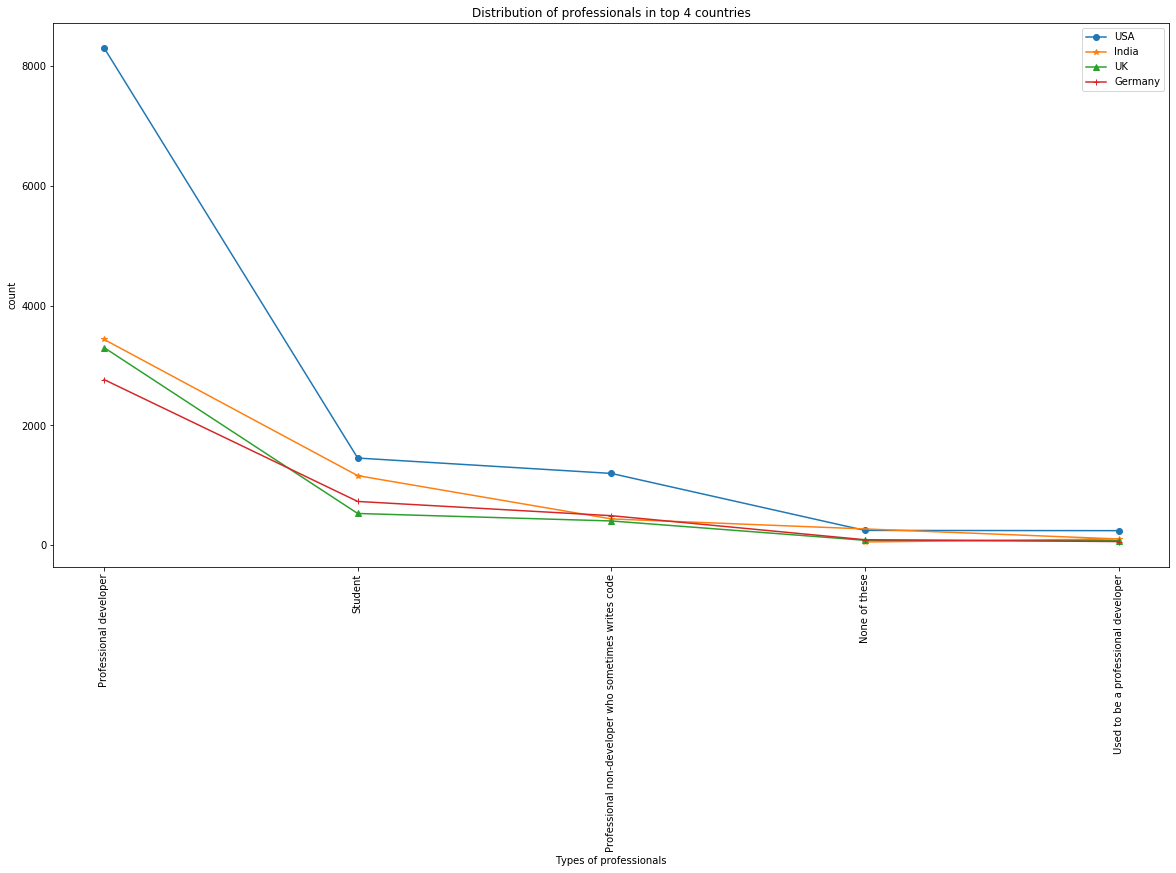

In [37]:
# 4 countries in the same plot
plt.figure(figsize=(20,10))
plt.plot(data_usa,label='USA',marker='o')
plt.plot(data_india,label='India',marker='*')
plt.plot(data_uk,label='UK',marker='^')
plt.plot(data_ger,label='Germany',marker='+')

plt.xticks(rotation='vertical')
plt.title('Distribution of professionals in top 4 countries')
plt.xlabel('Types of professionals')
plt.ylabel('count')
plt.legend()
plt.show()

Outcome: As we can see from the above picture, USA always has more people in every category using stackoverflow especially professional developers.

Question 3:What is the percentage of good rating for StackOverFlow?

In [38]:
# check for nulls
df['StackOverflowSatisfaction'].value_counts(dropna=False)

NaN     14800
8.0     10227
9.0      9792
10.0     9166
7.0      4724
6.0      1456
5.0       716
4.0       202
3.0       162
2.0        73
1.0        38
0.0        36
Name: StackOverflowSatisfaction, dtype: int64

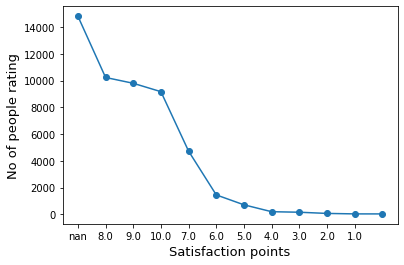

In [39]:
# we have many nulls, so we replace them with no applicaple -another category, we can fill with the mean but it will 
# skew our results. Nulls means I forgot to write points or I am not satisfy so we are not sure.
df['StackOverflowSatisfaction']=df['StackOverflowSatisfaction'].astype('str')
df['StackOverflowSatisfaction']=df['StackOverflowSatisfaction'].fillna('n/a')

satisf=df['StackOverflowSatisfaction'].value_counts()
xtick=np.arange(0,11,1)
plt.xticks(xtick)
plt.xlabel('Satisfaction points',fontsize='13')
plt.ylabel('No of people rating',fontsize='13')
plt.plot(satisf, marker='o')

In [44]:
# we keep only the pure grades and cast them to float
df['StackOverflowSatisfaction']=df['StackOverflowSatisfaction'][df['StackOverflowSatisfaction']!='n/a'].astype('float')

C:\Users\kosgi\Anaconda33\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [45]:
# keep the good grades
df['StackOverflowSatisfaction']=df['StackOverflowSatisfaction'][df['StackOverflowSatisfaction']>6.0]

In [47]:
# count the good evaluation
df['StackOverflowSatisfaction'].count()

33909

In [48]:
# find the percentage for good evaluation
perc=df['StackOverflowSatisfaction'].count()/df.shape[0]
perc

0.6598108655043586

The 66% of the people have good comments for stackoverflow.

In [49]:
### Final Results

From the above analysis we conclude:
    1.United States has by far the biggest percentage of entries in this survey.
    2.USA always has more people in every category using stackoverflow especially professional developers.
    3.The 66% of the people have good comments for stackoverflow.(although this perc may be greater 
                                                                  if we did not have nuulls in evaluation.)